# Import Data

In [ ]:
!pip install sklearn

In [ ]:
import tensorflow
import keras
import pandas as pd
import numpy as np
np.random.seed(1248)
import sklearn
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
data = pd.read_csv('../data/juliet.csv.zip')
#x = pd.read_csv("../data/graph_all.csv.gz")

In [4]:
len(data)

66347

In [6]:
x['type'] = x['type'] - 1 
y = data.iloc[:,6:]
y_label = y.iloc[x['type']]
x = x.drop(columns="type")

In [7]:
print(x.shape)
print(y.shape)

(60316, 128)
(66347, 122)


In [8]:
x.head(5)

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,0.550243,-1.423465,0.221529,-1.045743,0.371208,-0.296102,-0.361933,-1.216089,-1.276749,-0.600487,...,0.662246,1.088886,1.273861,0.506383,0.442113,0.071850,0.773860,-0.819406,1.079028,-0.114064
1,0.345009,-0.632539,0.513558,-0.641503,0.936678,-0.774966,0.107220,-0.600595,-1.495095,-0.478661,...,0.440597,-0.055308,0.732899,0.624905,-0.038601,0.884941,0.585291,-0.678294,1.390430,0.233143
2,-0.218646,-0.918204,0.479776,-0.845197,1.502448,-0.824413,0.782784,-0.315855,-0.180076,-0.119244,...,0.047266,-0.236197,0.419226,0.228021,-0.307598,0.849559,0.442569,-0.098779,2.077631,0.355881
3,-0.280127,-0.561671,0.912020,-0.510684,1.587624,-0.373373,0.028488,-0.575941,-0.335440,-0.979650,...,0.360942,-0.506887,0.554335,0.365092,0.261050,1.110404,0.269509,0.170101,0.610466,0.605643
4,0.374337,-0.087385,0.365638,-0.644513,1.130477,-1.249283,0.216007,-0.879599,0.488447,-0.274179,...,0.986118,-0.640120,0.190380,0.071200,-1.019643,0.338337,0.925309,-0.115115,0.837845,-0.313931


In [9]:
y.head(5)

,CWE-015,CWE-023,CWE-036,CWE-078,CWE-090,CWE-114,CWE-121,CWE-122,CWE-123,CWE-124,...,CWE-775,CWE-780,CWE-785,CWE-789,CWE-832,CWE-835,CWE-843,CWE-119,CWE-120,CWE-OTHERS
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y_label, test_size = 0.2, random_state = 0)

# Creating Model

# [Neural tutorial](https://towardsdatascience.com/neural-networks-from-scratch-easy-vs-hard-b26ddc2e89c7)

In [11]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam
base_model = Sequential()

In [12]:
base_model.add(Dense(128, input_dim=x_train.shape[1], activation='sigmoid'))
base_model.add(Dense(128, activation='sigmoid'))
base_model.add(Dense(units=y_train.shape[1], activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 122)               15738     
Total params: 48,762
Trainable params: 48,762
Non-trainable params: 0
_________________________________________________________________


In [14]:
base_model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
base_model.fit(x, y_label, epochs=20, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60316/60316 [==============================] - 4s 74us/step - loss: 2.6740 - categorical_accuracy: 0.3178
Epoch 2/20
60316/60316 [==============================] - 4s 70us/step - loss: 1.6996 - categorical_accuracy: 0.5116
Epoch 3/20
60316/60316 [==============================] - 6s 92us/step - loss: 1.4182 - categorical_accuracy: 0.5834
Epoch 4/20
60316/60316 [==============================] - 4s 71us/step - loss: 1.2675 - categorical_accuracy: 0.6251
Epoch 5/20
60316/60316 [==============================] - 5s 77us/step - loss: 1.1677 - categorical_accuracy: 0.6493
Epoch 6/20
60316/60316 [==============================] - 4s 74us/step - loss: 1.0957 - categorical_accuracy: 0.6696
Epoch 7/20
60316/60316 [==============================] - 4s 73us/step - loss: 1.0420 - categorical_accuracy: 0.6832
Epoch 8/20
60316/60316 [==============================] - 4s 72us/step - loss: 1.0003 - categorical_accuracy: 0.6940
Epoch 9/20
60316

In [15]:
import pickle
with open('../data/baseline-model-multilabel','wb') as f:
    pickle.dump(base_model,f)

In [16]:
base_model.evaluate(x_test,y_test)

12064/12064 [==============================] - 1s 52us/step


[0.7897102067973316, 0.7490881962864722]

# Visualisations and Evaluation

Table

In [16]:
def cve_predict_table(df, model, script, bug_label):

	'''Function takes in a 'vectorised' script and returns a dataframe containing:
	- The true CVE label
	- The predicted CVE label in descending order of certainty
	- The models certainty of the prediction
	'''

	new_df = df

	new_df['flaw_id'] = new_df.groupby(['flaw']).ngroup()
	new_df = new_df.filter(['flaw','flaw_id'])
	new_df = new_df.drop_duplicates()

	df2 = pd.DataFrame({"flaw":['na', 'na', 'na'], 
		"flaw_id":[119, 120, 121]}) # to get complete list of bugs thus far

	new_df = new_df.append(df2)
	new_df = new_df.sort_values(by = ['flaw_id'], ascending = True)
	new_df = new_df.reset_index()
	new_df = new_df.filter(['flaw','flaw_id'])

	bug_label = np.array(bug_label)
	bug_label = np.asscalar(np.where(bug_label == True)[0])

	script = script.values.reshape(1,128)

	original_label_one_hot = keras.utils.to_categorical(bug_label, num_classes = 122)
	original_labels = np.tile(original_label_one_hot, reps = (122,1)) # repeat encoding for each type of bug

	original_script = np.tile(script, reps = (122,1))

	prediction = model.predict(script)

	# Format results into a summary dataframe:

	original_label = pd.Series(
		np.apply_along_axis(np.argmax, axis = 1, arr = original_labels),
		name = 'True CVE',
		)

	original_label = original_label.transform(lambda x: new_df.iloc[x,0])

	predicted_label = pd.Series(
		range(122,),
		#np.apply_along_axis(np.argmax, axis = 1, arr = prediction),
		name = 'Model Prediction',
		)

	predicted_label = predicted_label.transform(lambda x: new_df.iloc[x,0])

	prediction_certainty = pd.Series(prediction.reshape(122,), name = 'Prediction Certainty',)

	summary = pd.concat(
		[
		original_label,
		predicted_label,
		prediction_certainty,
		],
		axis='columns',
		)

	summary = summary.sort_values(by = ['Prediction Certainty', 'Model Prediction'], ascending = False)
	summary = summary.filter(['Model Prediction', 'Prediction Certainty'])

	print('Neural Network predictions for ' + original_label[0] + ':')

	return summary.head(5)

In [17]:
example_script = x_test.iloc[0,]
example_label = y_test.iloc[0,]

In [18]:
cve_predict_table(data, base_model, example_script, example_label)

Neural Network predictions for CWE-762:


,Model Prediction,Prediction Certainty
110,CWE-762,0.998271
66,CWE-476,0.000739
101,CWE-675,0.000311
7,CWE-122,0.000180
112,CWE-775,0.000100


In [19]:
#!pip install seaborn

Heat map

In [20]:
import seaborn as sns
from sklearn import metrics
import matplotlib
from matplotlib.colors import LogNorm

In [21]:
y_predict= base_model.predict(x_test)

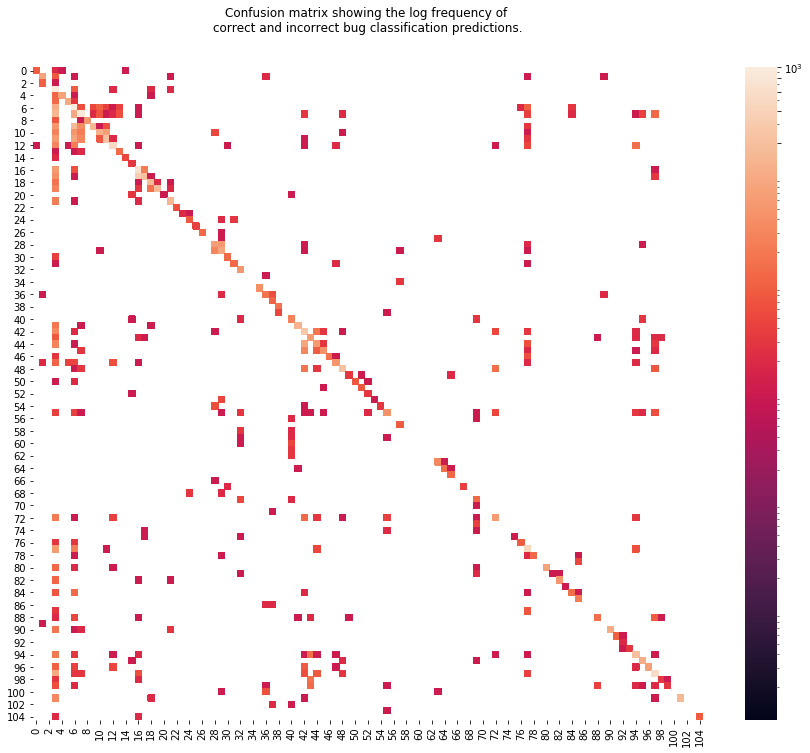

In [24]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix((y_test.values+0).argmax(axis=1), y_predict.argmax(axis=1)), 
)
confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(15, 12)
confusion_axes.set_title(
    'Confusion matrix showing the log frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
sns.heatmap(confusion_matrix, norm=LogNorm(confusion_matrix.min().min(),confusion_matrix.max().max()),
            vmin = 0.001, vmax=1000)

Confusion Matrics

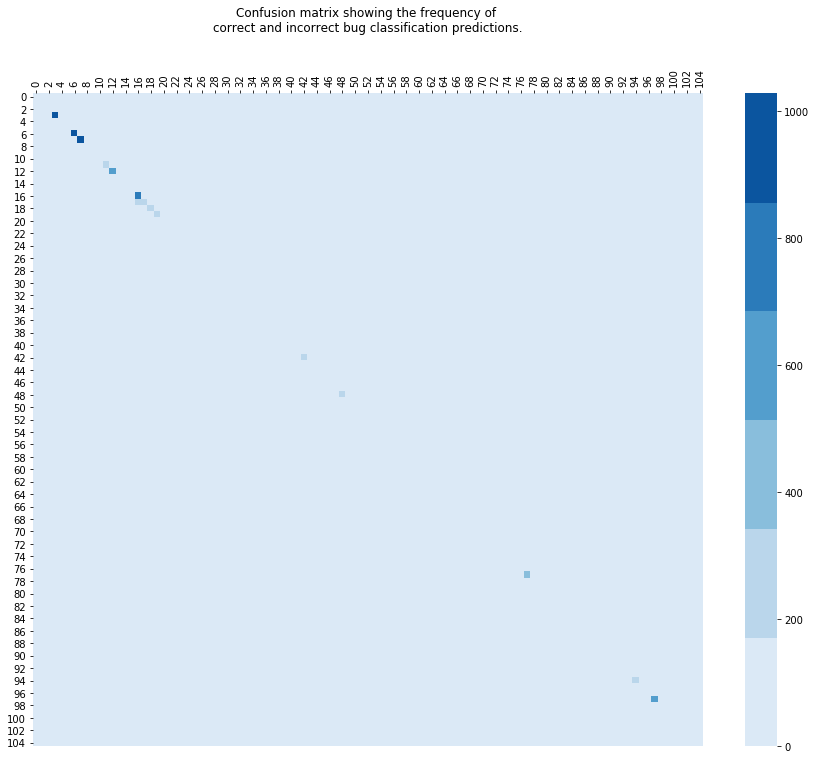

In [25]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix((y_test.values+0).argmax(axis=1), y_predict.argmax(axis=1)), 
    #index=['True Normal', 'True Bad'], 
    #columns=['Predicted Normal', 'Predicted Bad'],
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(15, 12)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)

confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=False,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [26]:
confusion_matrices = metrics.multilabel_confusion_matrix(
    (y_test+0).values,
    np.rint(y_predict)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


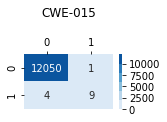

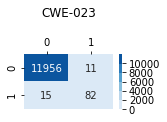

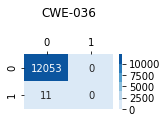

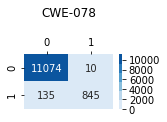

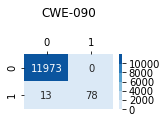

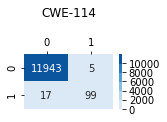

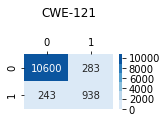

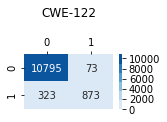

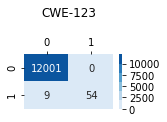

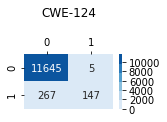

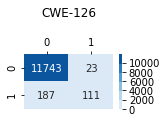

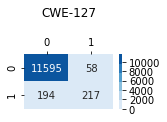

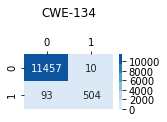

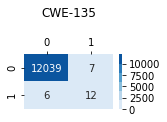

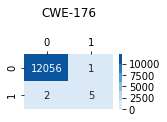

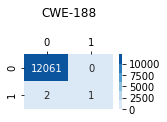

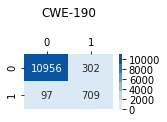

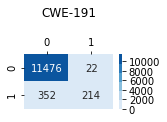

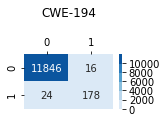

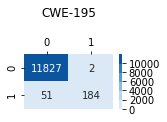

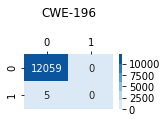

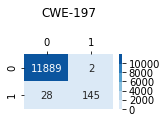

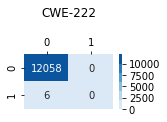

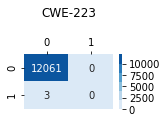

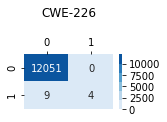

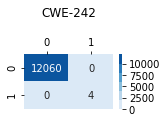

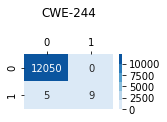

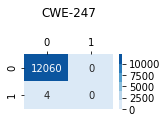

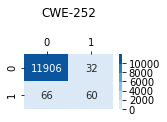

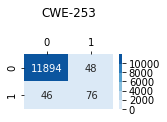

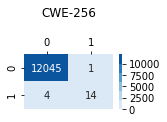

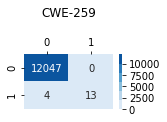

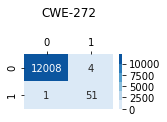

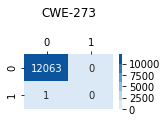

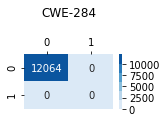

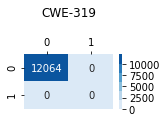

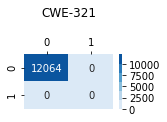

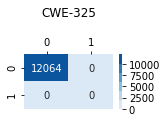

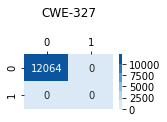

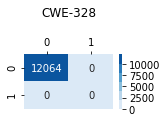

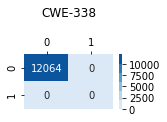

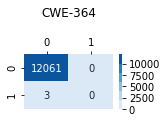

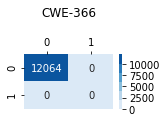

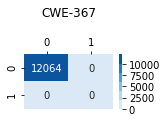

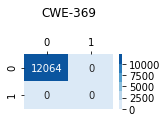

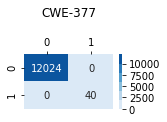

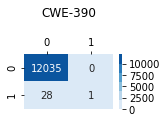

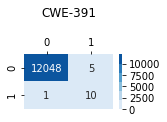

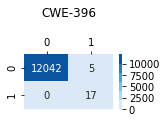

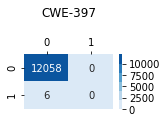

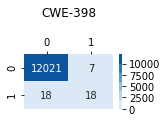

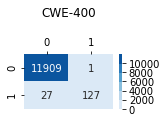

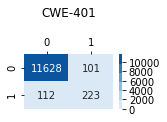

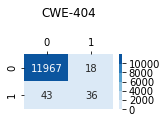

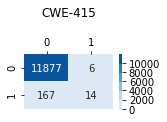

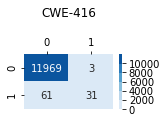

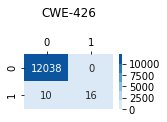

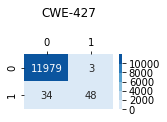

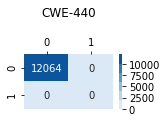

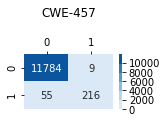

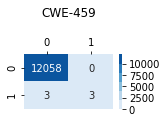

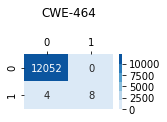

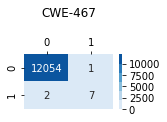

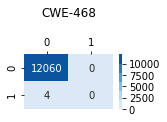

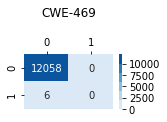

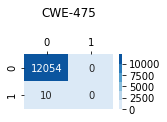

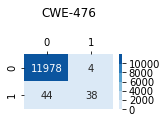

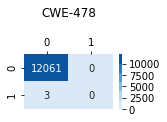

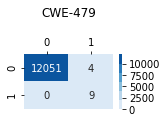

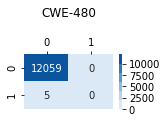

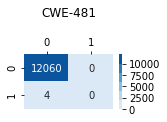

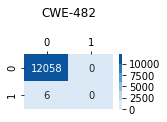

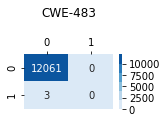

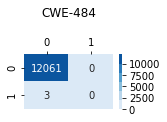

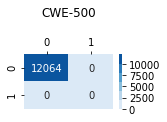

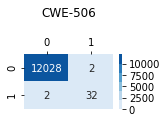

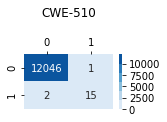

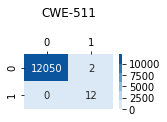

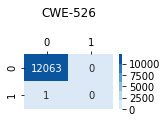

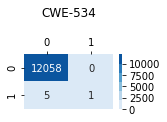

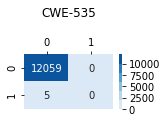

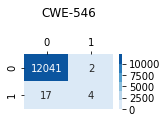

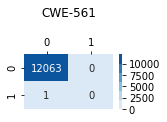

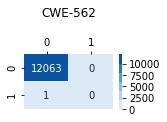

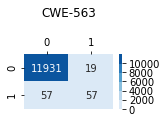

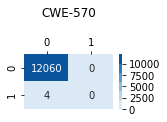

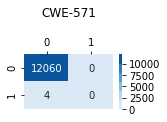

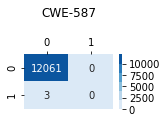

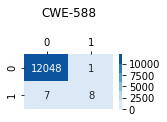

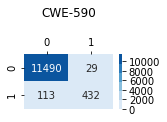

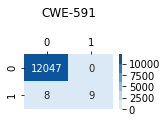

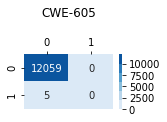

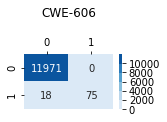

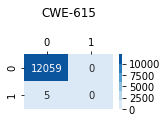

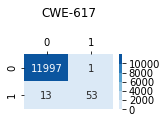

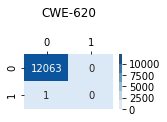

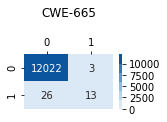

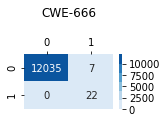

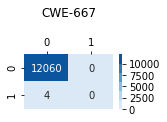

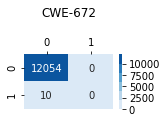

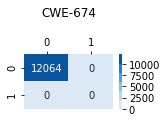

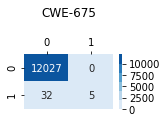

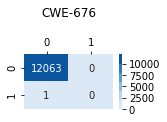

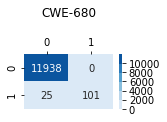

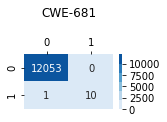

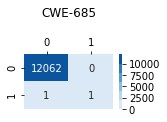

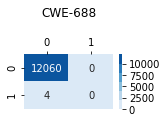

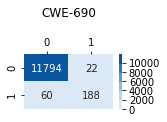

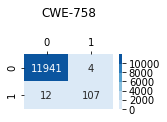

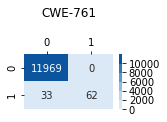

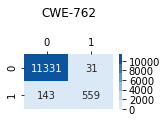

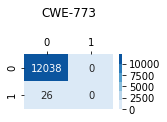

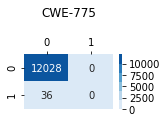

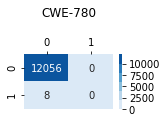

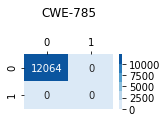

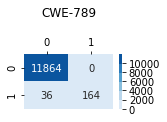

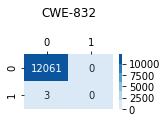

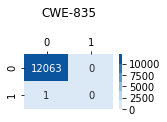

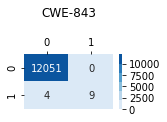

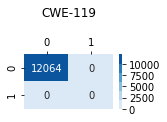

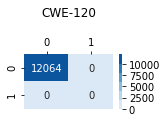

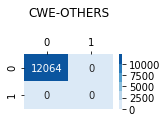

In [27]:
for label, confusion_matrix in zip(y_test.columns, confusion_matrices):

    confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
    confusion_figure.set_size_inches(2, 1)
    confusion_axes.set_title(
        label + 
        '\n'  # hack to avoid overlap with x-axis labels below
    )
    confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
    _ = sns.heatmap(
        confusion_matrix,
        annot=True,
        fmt="d",
        cmap=sns.color_palette("Blues"),
        vmin=0,
        ax=confusion_axes,
    )

ROC Curve

In [30]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve((y_test.values+0).argmax(axis=1)-5, y_predict.argmax(axis=1)-5)

ValueError: multiclass format is not supported

In [31]:
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

NameError: name 'plt' is not defined